In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr

from math import sqrt, log, exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [15]:

def Get_Clean_Dataset():

    df = pd.read_csv("tcd-ml-1920-group-income-train.csv")
    
    df.drop_duplicates(subset ="Instance", 
                     keep = False, inplace = True)

    
    df['Yearly Income in addition to Salary (e.g. Rental Income)'] = df['Yearly Income in addition to Salary (e.g. Rental Income)'].str.replace(' EUR', '').astype(float)

    return df

In [16]:
data_set = Get_Clean_Dataset()
data_set.head()

,Instance,Year of Record,Housing Situation,Crime Level in the City of Employement,Work Experience in Current Job [years],Satisfation with employer,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Yearly Income in addition to Salary (e.g. Rental Income),Total Yearly Income [EUR]
0,1,1940.0,0,33,17,Unhappy,other,45,Afghanistan,25179,group head,No,1,Black,182,0.0,6182.05
1,2,1940.0,0,25,4.9,Unhappy,female,17,Afghanistan,2278204,heavy vehicle and mobile equipment service tec...,No,0,Blond,172,0.0,6819.69
2,3,1940.0,0,34,21,Unhappy,female,48,Afghanistan,822134,sorter,Bachelor,0,Blond,144,0.0,8663.53
3,4,1940.0,0,70,18,Average,female,42,Albania,59477,quality control senior engineer,No,1,Brown,152,0.0,2400.64
4,5,1940.0,0,51,8,Happy,other,15,Albania,23494,logistician,Master,1,Black,180,0.0,2816.18


In [17]:
def ReplaceNan_Numeric(df,F_Name):
    average = df[F_Name].dropna().mean(axis=0)
    df[F_Name] = df[F_Name].replace(np.nan, average, inplace=False)
    return df


In [18]:
string="Year of Record"
data_set = ReplaceNan_Numeric(data_set,string)


x = data_set[string]
y = data_set["Total Yearly Income [EUR]"]

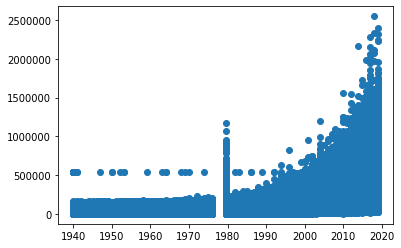

(0.641265240972165, 0.0)


In [19]:
fig, ax = plt.subplots()
ax.scatter(x,y)

plt.show()


In [20]:
print(pearsonr(x,y))

(0.641265240972165, 0.0)


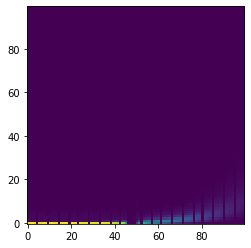

In [21]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower')
plt.show()

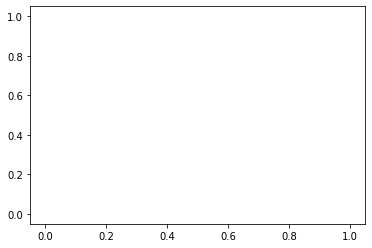

In [22]:
fig, ax = plt.subplots()
ax.scatter(np.exp(x),y)
plt.show()

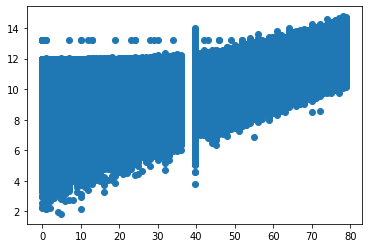

In [27]:
fig, ax = plt.subplots()
ax.scatter(x-1940,np.log(y))
plt.show()

In [28]:
print(pearsonr(x-1940,np.log(y)))

(0.8604409626279517, 0.0)


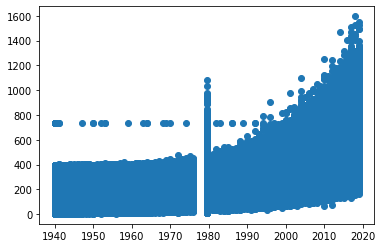

In [24]:
fig, ax = plt.subplots()
ax.scatter(x,np.sqrt(y))
plt.show()

In [26]:
pearsonr(x,np.sqrt(y))

(0.8004747998481752, 0.0)

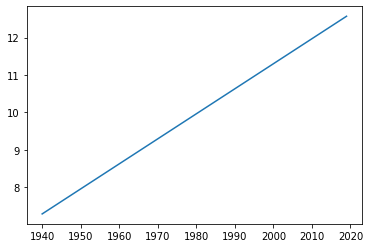

In [10]:
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, np.log(y), 1))(np.unique(x)))


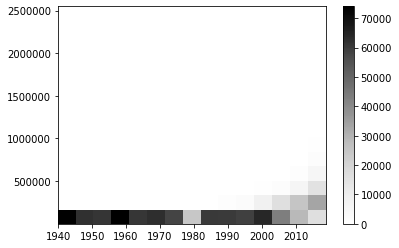

In [11]:
plt.hist2d(x, y, bins=(15, 15), cmap=plt.cm.Greys)
plt.colorbar()
#plt.show()

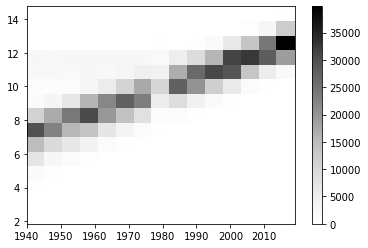

In [12]:
plt.hist2d(x, np.log(y), bins=(15, 15), cmap=plt.cm.Greys)
plt.colorbar()
#plt.show()